In [91]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager as fm


In [70]:

all_arrays = {}
for subject in ["character","object","state"]:
    file_path = f"../tracing_results/{subject}.json"
    with open(file_path, "r") as f:
        data = json.load(f)
    keys_sorted = sorted(data.keys(), key=int, reverse=True)
    array = np.array([[data[row][col] for col in sorted(data[row].keys(), key=int)] for row in keys_sorted])
    all_arrays[subject] = np.rot90(array, k=3)

#

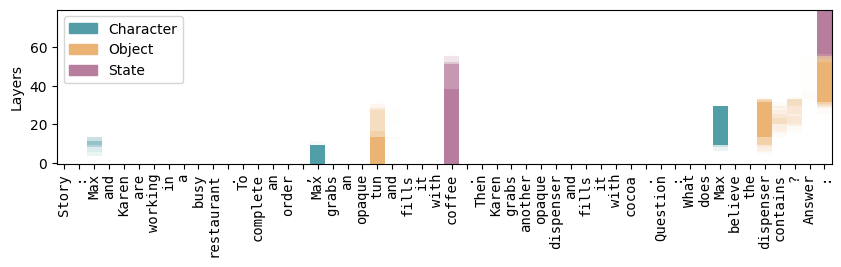

In [133]:
# Create a colormap with white as the lowest value
# cmap = plt.cm.hot
# cmap_colors = cmap(np.linspace(1, 0.5, 256))
# cmap_colors[0] = [0, 0, 0, 0]  # Set the lowest value to white (RGB + Alpha)
# custom_cmap = ListedColormap(cmap_colors)

# Define a custom colormap using specific RGB values
custom_cmap_char = LinearSegmentedColormap.from_list(
    "custom_rgb_heatmap", 
    [
        (1.0, 1.0, 1.0, 0),  # White
        (83/256, 159/256, 167/256),  # Light Blue
    ], 
    N=10  # Number of discrete colors
)


custom_cmap_obj = LinearSegmentedColormap.from_list(
    "custom_rgb_heatmap", 
    [
        (1.0, 1.0, 1.0, 0),  # White
        (236/256, 181/256, 118/256),  # Light Blue
    ], 
    N=10  # Number of discrete colors
)

custom_cmap_state = LinearSegmentedColormap.from_list(
    "custom_rgb_heatmap", 
    [
        (1.0, 1.0, 1.0, 0),  # White
        (184/256, 126/256, 158/256),  # Light Blue
    ], 
    N=10  # Number of discrete colors
)


heatmaps = [
    ("character", custom_cmap_char),
    ("object", custom_cmap_obj),
    ("state", custom_cmap_state)
]

# y_axis_font = fm.FontProperties(family="Avant Garde")  # Closest available to Avnier
# x_axis_font = fm.FontProperties(family="Courier New")

# Plot the heatmap with the custom colormap
fig, ax = plt.subplots(figsize=(10, 2))
# Set transparency for the figure and axis background
fig.patch.set_alpha(0)  # Make figure background transparent
ax.set_facecolor("none")  # Set axis background transparent

for i, (title, cmap) in enumerate(heatmaps):
    im = ax.imshow(all_arrays[title], cmap=cmap, interpolation="nearest", aspect="auto", origin="lower", alpha=1)
    ax.set_facecolor("none")
    # plt.colorbar(im, ax=ax, label=f"Value Intensity ({title})")


# heatmap = ax.imshow(rotated_array, cmap=custom_cmap_char, interpolation="nearest", aspect="auto", origin="lower")
# fig.patch.set_facecolor("white")  # Ensure the background remains white
# ax.set_facecolor("white")

# Add colorbar
# cbar = plt.colorbar(heatmap, label="Value Intensity")

# Set labels and title
# Set labels and title
# ax.set_xlabel("Rows")
ax.set_ylabel("Layers")
# ax.set_title("Combined Heatmaps on the Same X-Axis")


import string

# Generate a placeholder list of words (letters for now)
num_x_ticks = rotated_array.shape[1]
x_labels = "Story : Max and Karen are working in a busy restaurant . To complete an order , Max grabs an opaque tun and fills it with coffee . Then Karen grabs another opaque dispenser and fills it with cocoa . Question : What does Max believe the dispenser contains ? Answer :".split(" ")[:num_x_ticks]  # Use A-Z, truncate if needed

# Show the plot
# plt.xlabel("Rows (Vertical Tokens)")#, fontproperties=x_axis_font)
plt.ylabel("Layers")#, fontproperties=y_axis_font)
# plt.title("Heatmap with Custom Fonts and Vertical Token Representation", fontproperties=y_axis_font)

# Set x-axis ticks with words
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, fontfamily="monospace")



# Manually add a legend-like annotation for clarity
legend_labels = ["Character","Object","State"]
legend_colors = [custom_cmap_char(0.9), custom_cmap_obj(.9), custom_cmap_state(.9)]

# Create legend patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add the legend to the plot
ax.legend(handles=legend_patches, loc="upper left",)

# plt.legend(["Character","Object","State"])

# Apply fonts to axis tick labels
# for label in ax.get_xticklabels():
    # label.set_fontproperties(x_axis_font)
# for label in ax.get_yticklabels():
    # label.set_fontproperties(y_axis_font)

# Show the plot
plt.show()
